In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("churn_dataset.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

<Axes: xlabel='Churn', ylabel='count'>

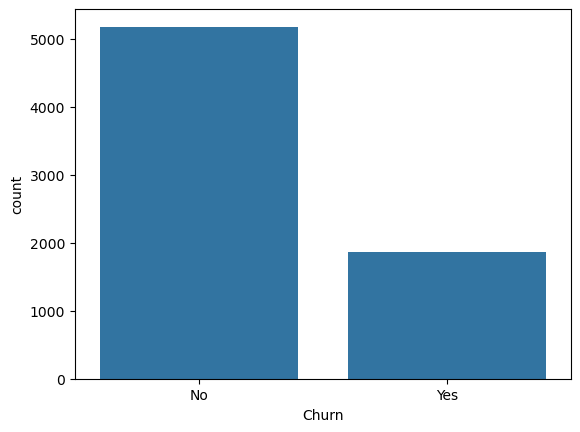

In [20]:
sns.countplot(data=df, x='Churn')

<Axes: xlabel='Contract', ylabel='count'>

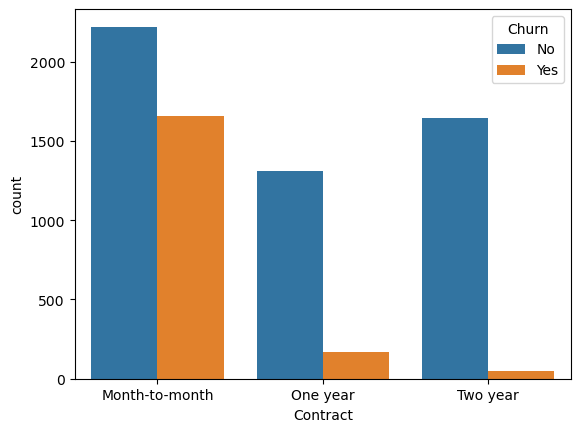

In [21]:
sns.countplot(data=df, x='Contract', hue='Churn')

<Axes: xlabel='tenure', ylabel='Count'>

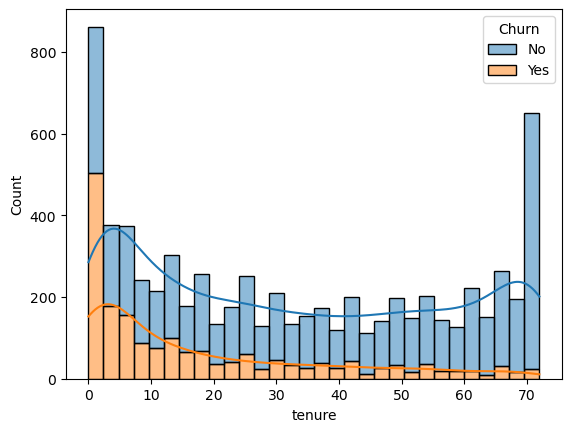

In [22]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, multiple='stack')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

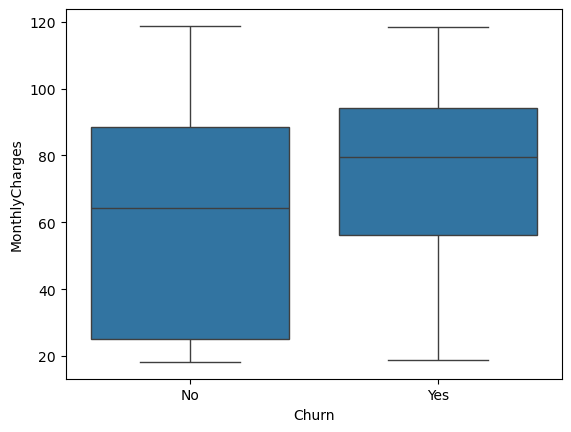

In [23]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

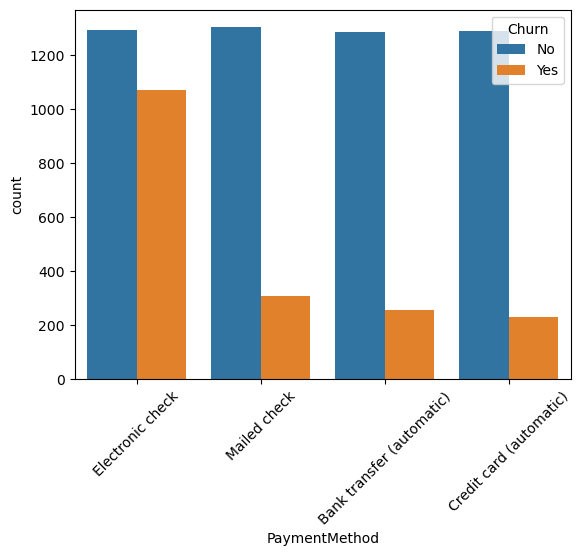

In [24]:
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)

<Axes: >

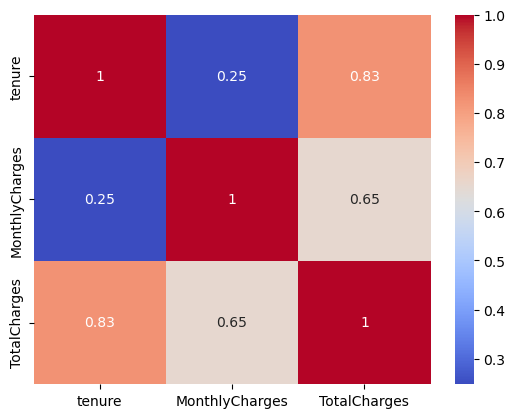

In [25]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='InternetService', ylabel='count'>

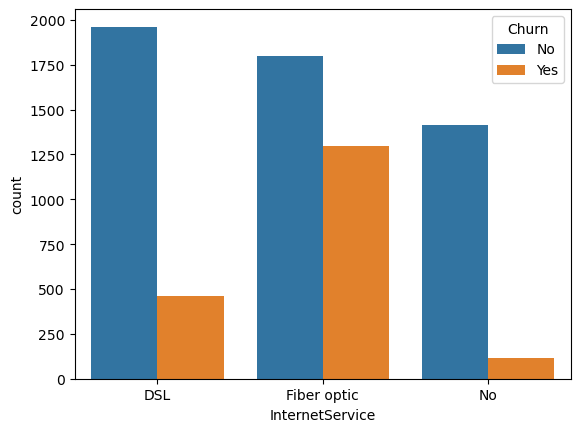

In [26]:
sns.countplot(data=df, x='InternetService', hue='Churn')

<Axes: xlabel='TechSupport', ylabel='count'>

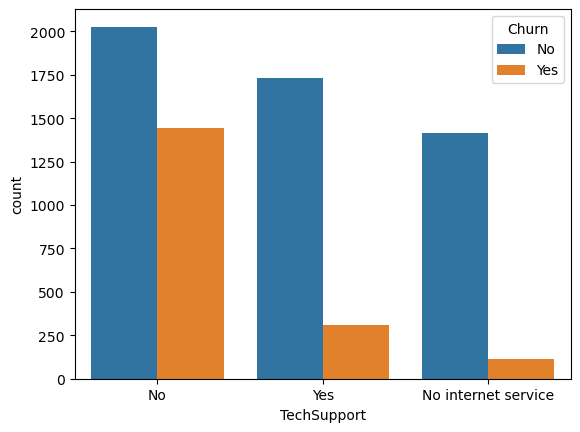

In [27]:
sns.countplot(data=df, x='TechSupport', hue='Churn')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

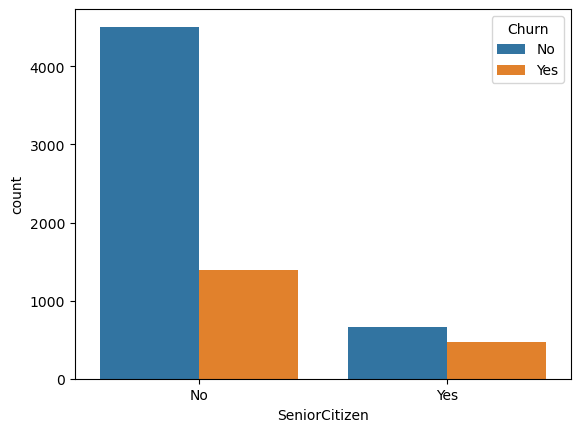

In [28]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

Text(0.5, 1.0, 'Average Total Charges over Tenure')

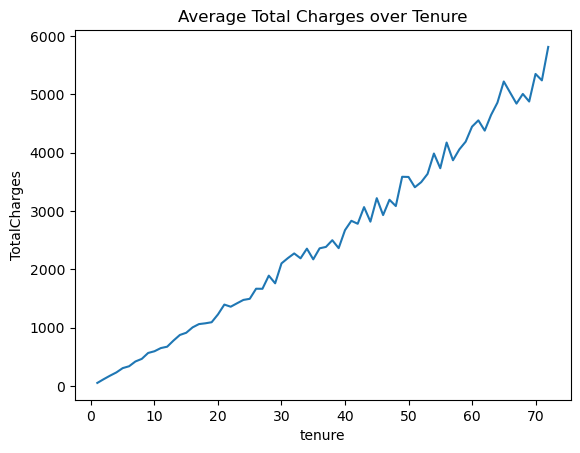

In [30]:
avg_total = df.groupby('tenure')['TotalCharges'].mean().reset_index()
sns.lineplot(data=avg_total, x='tenure', y='TotalCharges')
plt.title('Average Total Charges over Tenure')

Text(0, 0.5, '')

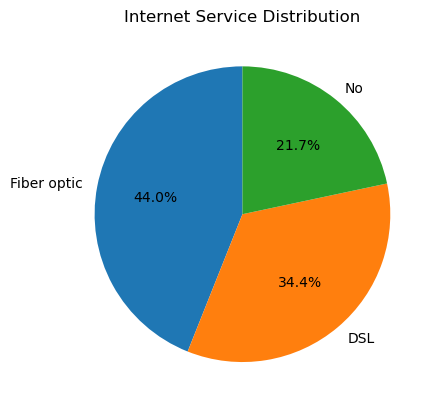

In [31]:
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Internet Service Distribution')
plt.ylabel('')

Text(0.5, 1.0, 'Monthly vs. Total Charges by Churn')

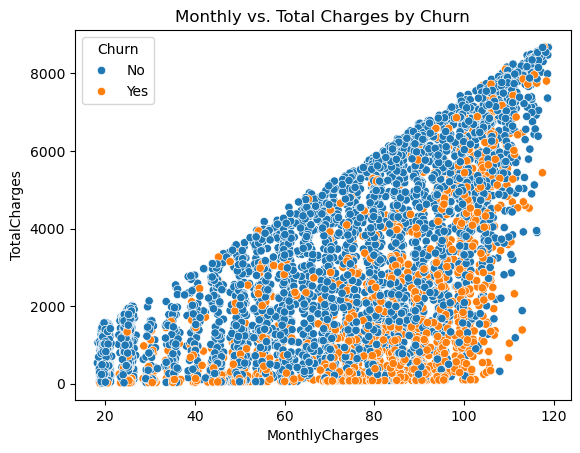

In [32]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly vs. Total Charges by Churn')

Text(0.5, 1.0, 'Cumulative Churn Over Tenure')

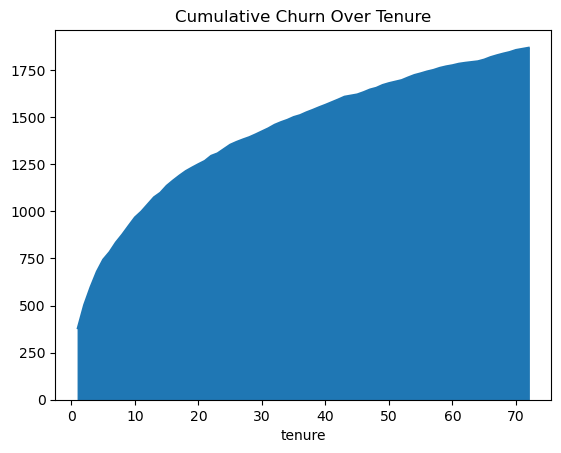

In [33]:
churn_tenure = df[df['Churn'] == 'Yes'].groupby('tenure').size().cumsum()
churn_tenure.plot.area()
plt.title('Cumulative Churn Over Tenure')

Text(0.5, 1.0, 'Monthly Charges Density Plot by Churn')

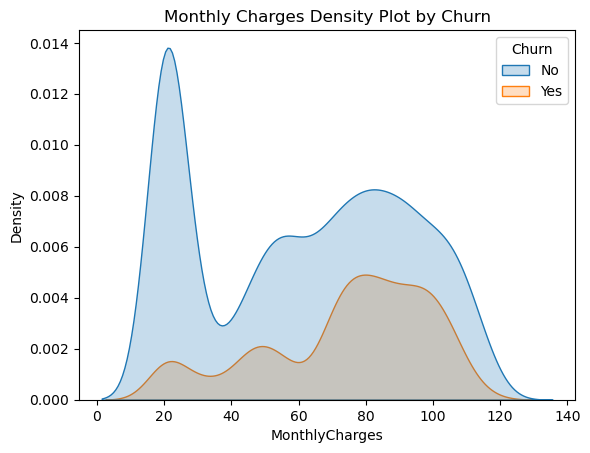

In [34]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Monthly Charges Density Plot by Churn')

Text(0.5, 1.0, 'Monthly Charges vs Churn (Swarm View)')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


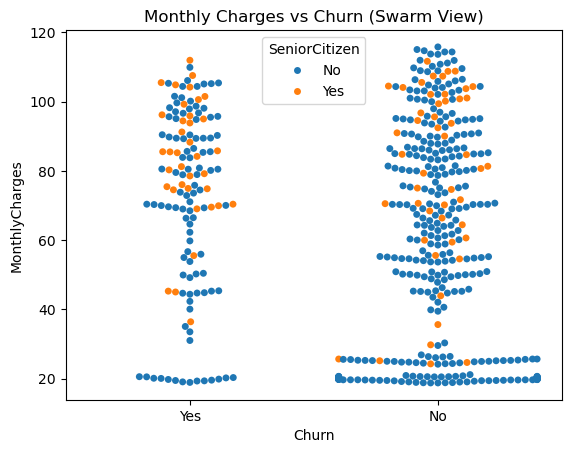

In [35]:
sns.swarmplot(data=df.sample(500), x='Churn', y='MonthlyCharges', hue='SeniorCitizen')
plt.title('Monthly Charges vs Churn (Swarm View)')

Text(0.5, 1.0, 'Online Security vs Churn')

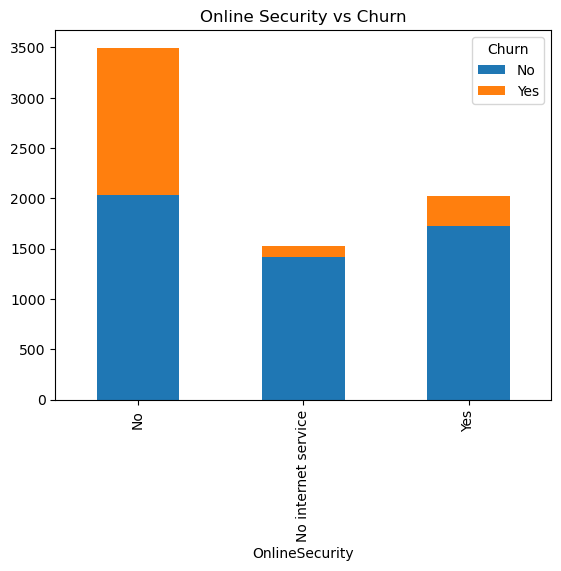

In [36]:
pd.crosstab(df['OnlineSecurity'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Online Security vs Churn')

Text(0.5, 1.0, 'Churn Rate by Internet Service and Tech Support')

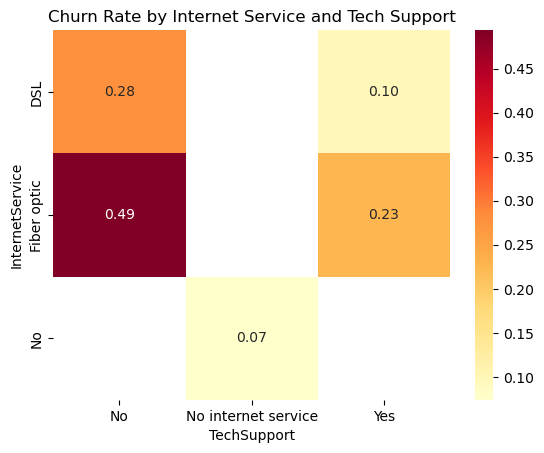

In [37]:
pivot = pd.crosstab(df['InternetService'], df['TechSupport'], values=df['Churn'] == 'Yes', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Churn Rate by Internet Service and Tech Support')